In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Generate dataset

In [2]:
from qmmc.distrib import sep_rvs, sep_logpdf

In [3]:
mu, sigma, nu, tau = 0, 1, 1.5, 3
n = 10000
x = sep_rvs(mu=mu, sigma=sigma, nu=nu, tau=tau, size=n)

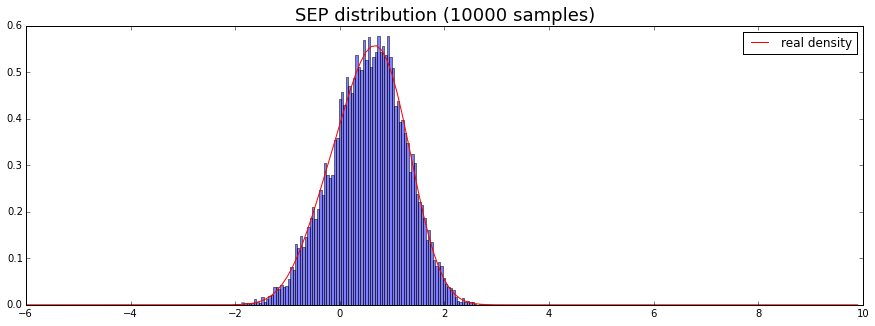

In [4]:
plt.figure(figsize=(15, 5))
plt.hist(x, bins=100, normed=True, alpha=.5)

xx = np.arange(-6, 10, .1)
plt.plot(xx, np.exp(sep_logpdf(xx, mu=mu, sigma=sigma, nu=nu, tau=tau)), color='red')

plt.legend(['real density'], loc='best')
plt.title('SEP distribution (%s samples)' % n, size=18)
plt.show()

## Estimate

In [5]:
from qmmc import InvGamma, Normal, SEP, Value
from qmmc import Model

In [6]:
mu_0, sigma_0 = Value(0), Value(2)
shape_0, scale_0 = Value(2), Value(2)

mu_ = Normal(mu_0, sigma_0, name='mu')
sigma_ = InvGamma(shape_0, scale_0, name='sigma')
nu_ = Normal(mu_0, sigma_0, name='nu')
tau_ = InvGamma(shape_0, scale_0, name='tau')

x_ = SEP(mu_, sigma_, nu_, tau_, value=x, observed=True, name='x')

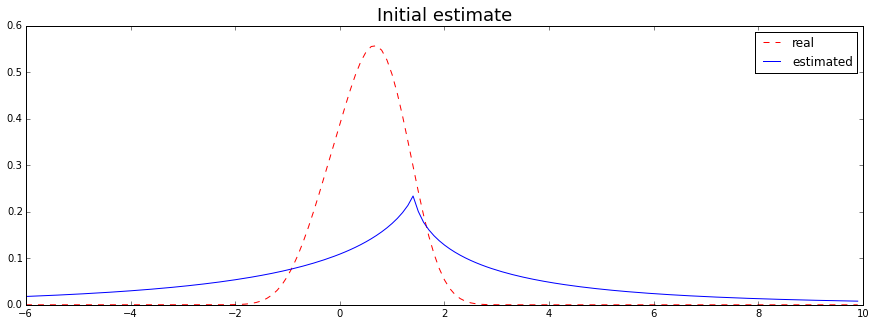

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(xx, np.exp(sep_logpdf(xx, mu=mu, sigma=sigma, nu=nu, tau=tau)), color='red', linestyle='--')
plt.plot(xx, np.exp(sep_logpdf(xx, mu=mu_.value, sigma=sigma_.value, nu=nu_.value, tau=tau_.value)), color='blue')
plt.legend(['real', 'estimated'], loc='best')
plt.title("Initial estimate", size=18)
plt.show()

In [8]:
model = Model(variables=[mu_, sigma_, nu_, tau_, x_])

In [12]:
%%time
model.estimate(1000)

0% 1% 2% 3% 4% 5% 6% 7% 8% 9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 28% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 56% 57% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95% 96% 97% 98% 99% 100%
CPU times: user 16.5 s, sys: 16.1 ms, total: 16.6 s
Wall time: 16.6 s


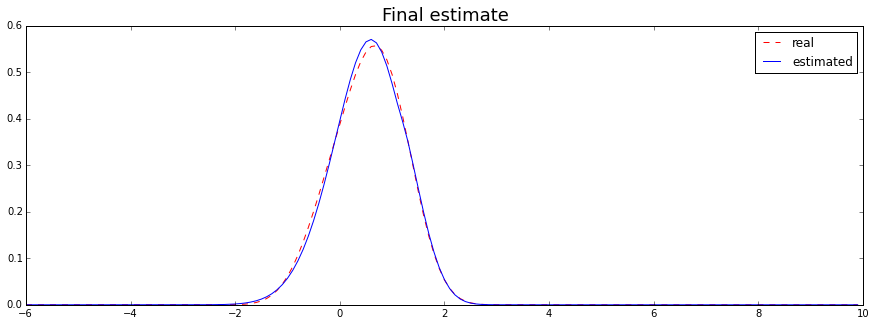

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(xx, np.exp(sep_logpdf(xx, mu=mu, sigma=sigma, nu=nu, tau=tau)), color='red', linestyle='--')
plt.plot(xx, np.exp(sep_logpdf(xx, mu=mu_.value, sigma=sigma_.value, nu=nu_.value, tau=tau_.value)), color='blue')
plt.legend(['real', 'estimated'], loc='best')
plt.title("Final estimate", size=18)
plt.show()

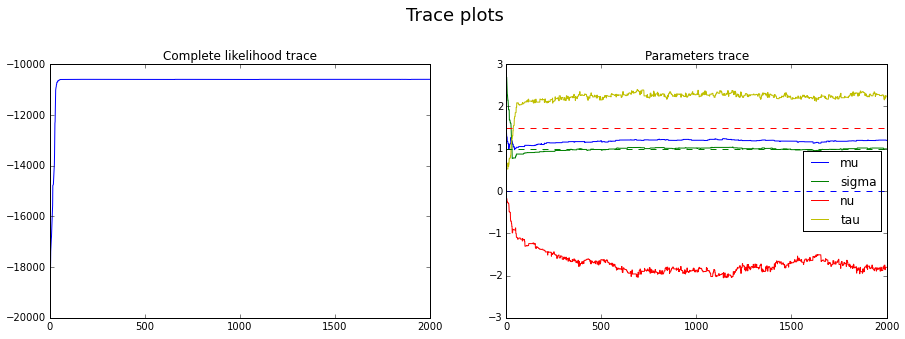

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(model.logp_hist)
plt.title('Complete likelihood trace')

plt.subplot(2, 2, 2)
plt.plot(model.samplers['mu'].get_history(), color='b')
plt.plot(model.samplers['sigma'].get_history(), color='g')
plt.plot(model.samplers['nu'].get_history(), color='r')
plt.plot(model.samplers['tau'].get_history(), color='y')

plt.axhline(mu, color='b', linestyle='--')
plt.axhline(sigma, color='g', linestyle='--')
plt.axhline(nu, color='r', linestyle='--')
plt.axhline(tau, color='y', linestyle='--')
plt.title('Parameters trace')

plt.legend(['mu', 'sigma', 'nu', 'tau'], loc='best')
plt.suptitle("Trace plots", size=18) 
plt.show()